In [1]:
# Загрузка библиотек 
import pandas as pd
import seaborn as sns
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

### Задание 1

Загрузите файл HR.csv в pandas dataframe

In [2]:
hr = pd.read_csv('HR.csv')
hr

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


### Задание 2

Рассчитайте основные статистики для переменных (среднее, медиана, мода, мин/макс, сред.отклонение).

In [3]:
stats = hr.describe().append(hr.mode()).rename(index={0: 'mode'})[:-1]
stats.loc['IQR'] = stats.loc['75%', :] - stats.loc['25%', :]
stats.loc['lower outlier'] = stats.loc['25%', :] - 1.5 * (stats.loc['IQR', :])
stats.loc['higher outlier'] = stats.loc['75%', :] + 1.5 * (stats.loc['IQR', :])
stats

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,NaN,NaN
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,NaN,NaN
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,NaN,NaN
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,NaN,NaN
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000,NaN,NaN
mode,0.100000,0.550000,4.000000,135.000000,3.000000,0.000000,0.000000,0.000000,sales,low
IQR,0.380000,0.310000,2.000000,89.000000,1.000000,0.000000,0.000000,0.000000,NaN,NaN


### Задание 3

Рассчитайте и визуализировать корреляционную матрицу для количественных переменных. Определите две самые скоррелированные и две наименее скоррелированные переменные.

<AxesSubplot:>

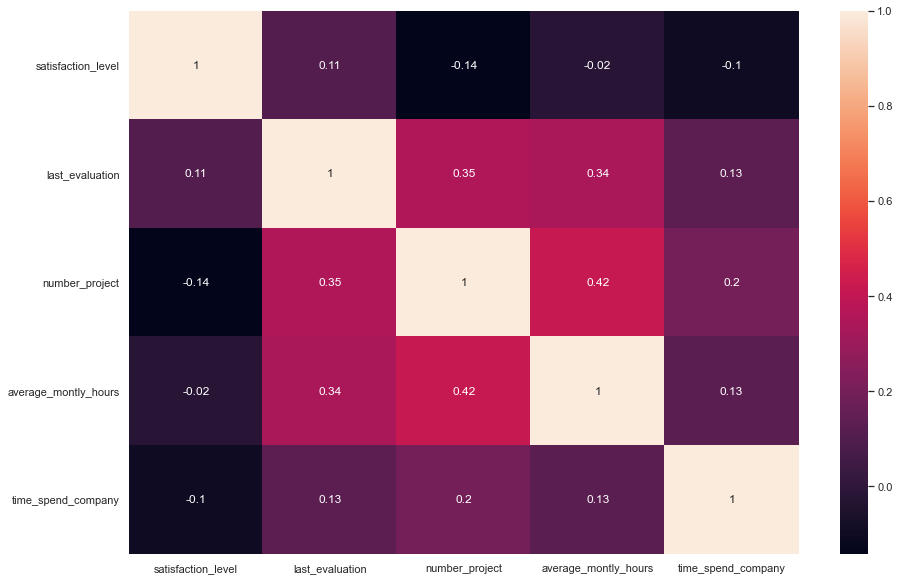

In [4]:
hr_quantitative = hr.iloc[:, :5]

sns.set(rc = {'figure.figsize' : (15, 10)})
sns.heatmap(hr_quantitative.corr(), annot = True)

**Самые скоррелированные переменные:**
number_project и average_monthly_hours
number_project и last_evaluation

**Наименее скоррелированные переменные:**
average_monthly_hours и satisfaction_level
satisfaction_level и time_spend_company

По шкале Чеддока даже самые скоррелированные переменные имеют всего лишь умеренную качественную характеристику силы связи.

### Задание 4

Рассчитайте сколько сотрудников работает в каждомдепартаменте.

<AxesSubplot:xlabel='department'>

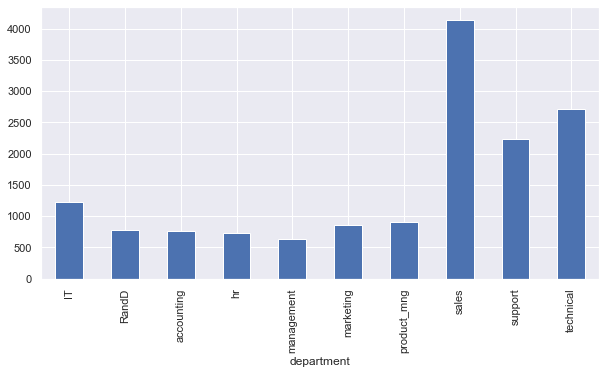

In [5]:
hr.groupby('department')['department'].count().plot.bar(x = 'department', y = 'count', figsize=(10, 5))

### Задание 5

Показать распределение сотрудников по зарплатам.

<AxesSubplot:ylabel='salary'>

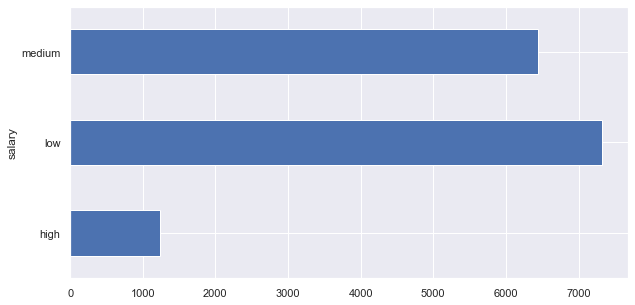

In [6]:
hr.groupby('salary')['salary'].count().plot.barh(figsize=(10, 5))

### Задание 6

Показать распределение сотрудников по зарплатам в каждомдепартаменте по отдельности

<AxesSubplot:ylabel='department,salary'>

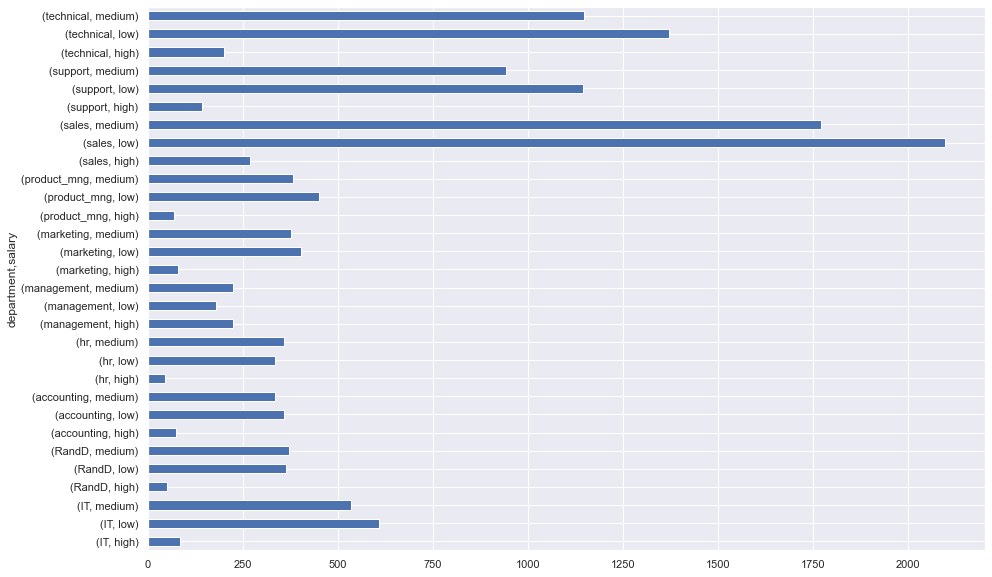

In [7]:
hr.groupby(['department', 'salary'])['salary'].count().plot.barh(figsize=(15, 10))

### Задание 7

Проверить гипотезу, что сотрудники с высоким окладомпроводят на работе больше времени, чем сотрудники с низкимокладом.

In [8]:
stat, p = ttest_ind(hr[hr['salary'] == 'high']['average_montly_hours'], hr[hr['salary'] == 'low']['average_montly_hours'])
print(f't-статистика: {stat}\np-value: {p}')

t-статистика: -0.7288680398062308
p-value: 0.4661023478267259


Поскольку p-value больше уровня значимости в 0.05, то статистической значимости между временем проведённым сотрудниками с большим и меньшим окладом не наблюдается. 

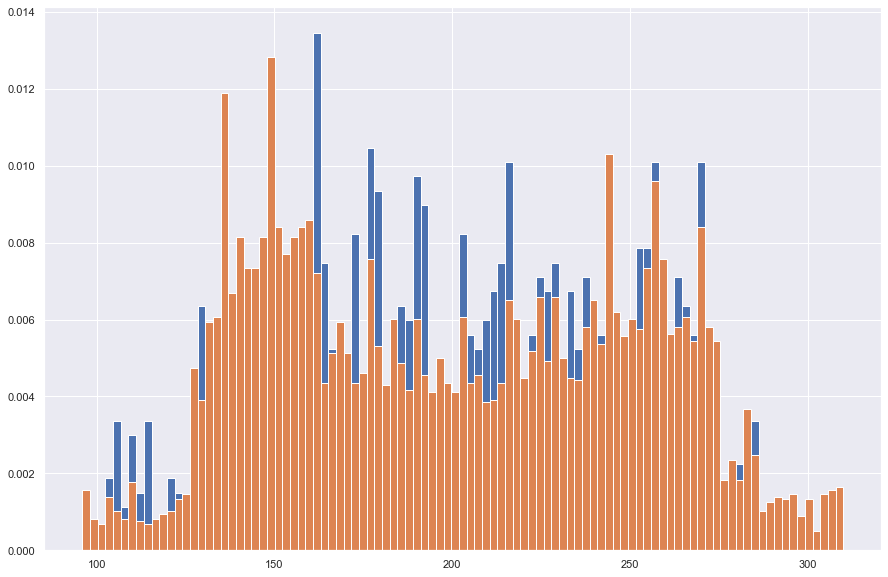

In [9]:
plt.hist(hr[hr['salary'] == 'high']['average_montly_hours'], bins = np.linspace(min(hr['average_montly_hours']), max(hr['average_montly_hours']), 100), density = True);
plt.hist(hr[hr['salary'] == 'low']['average_montly_hours'], bins = np.linspace(min(hr['average_montly_hours']), max(hr['average_montly_hours']), 100), density = True);

### Задача 8

Рассчитать следующие показатели среди уволившихся и неуволившихся сотрудников (по отдельности): 
1. Доля сотрудников с повышением за последние 5 лет
2. Средняя степень удовлетворенности
3. Среднее количество проектов

**Уволившиеся**

In [10]:
retired = hr[hr['left'] == 1]

In [11]:
#1
len(retired[retired['promotion_last_5years'] == 1]) / len(retired) 

0.005320638476617194

In [12]:
#2
retired['satisfaction_level'].mean()

0.44009801176140917

In [13]:
#3
retired['number_project'].mean()

3.8555026603192384

**Неуволившиеся**

In [14]:
no_retired = hr[hr['left'] == 0]

In [15]:
#1
len(no_retired[no_retired['promotion_last_5years'] == 1]) / len(no_retired)

0.026251312565628283

In [16]:
#2
no_retired['satisfaction_level'].mean()

0.666809590479516

In [17]:
#3
no_retired['number_project'].mean()

3.786664333216661

### Задание 9

Разделить данные на тестовую и обучающую выборки. Построить модель LDA, предсказывающую уволился лисотрудник на основе имеющихся факторов (кроме department и salary). Оценить качество модели на тестовой выборки

In [18]:
X = hr.drop(['department', 'salary', 'left'], axis = 1) 
y = hr['left']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 41)

In [20]:
lda = LinearDiscriminantAnalysis()

lda.fit(X_train, y_train)
lda.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [21]:
result = pd.DataFrame([y_test, lda.predict(X_test)]).T.rename(columns = {'left': 'real', 'Unnamed 0': 'predict'}).fillna(0).sort_index()
result

,real,predict
2,1.0,0.0
15,1.0,1.0
19,1.0,0.0
24,1.0,0.0
27,1.0,0.0
...,...,...
14978,1.0,0.0
14979,1.0,0.0
14994,1.0,0.0
14997,1.0,0.0


In [22]:
# Коэффициент точности
accuracy_score(y_test, lda.predict(X_test))

0.76

In [23]:
# Матрица ошибок
cnf_matrix = confusion_matrix(y_test, lda.predict(X_test))
cnf_matrix

array([[2079,  198],
       [ 522,  201]], dtype=int64)

- Верно неуволенных: 2079
- Верно уволенных: 201
- Ошибочно неуволенных: 198
- Ошибочно уволенных: 522